In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [28]:
def f(x,y):
    return x+2*y

In [29]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4

In [30]:
N = 20
t = np.linspace(0,2,N)
h = t[1] - t[0]

In [31]:
yext = Solucion(t)

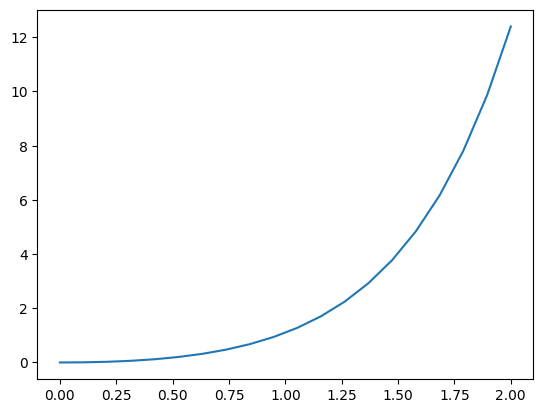

In [32]:
plt.plot(t,yext)

In [33]:
def GetRungeKutta2(x,y,h):
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h,y[i-1]+h*k1)

        y[i] = y[i-1] + h/2*(k1+k2)
    

In [34]:
def GetRungeKutta3(x,y,h):
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h/2,y[i-1]+h/2*k1)
        k3 = f(x[i-1]+h,y[i-1]-h*k1+2*h*k2)

        y[i] = y[i-1] + h/6*(k1+4*k2+k3)

In [35]:
def GetRungeKutta4(x,y,h):
    for i in range(1,len(x)):
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h/2,y[i-1]+h/2*k1)
        k3 = f(x[i-1]+h/2,y[i-1]+h/2*k2)
        k4 = f(x[i-1]+h,y[i-1]+h*k3)

        y[i] = y[i-1] + h/6*(k1+2*k2+2*k3+k4)

In [36]:
y2 = np.zeros_like(t)
y2[0] = 0.
y3 = np.zeros_like(t)
y3[0] = 0.
y4 = np.zeros_like(t)
y4[0] = 0.

In [37]:
GetRungeKutta2(t,y2,h)
GetRungeKutta3(t,y3,h)
GetRungeKutta4(t,y4,h)

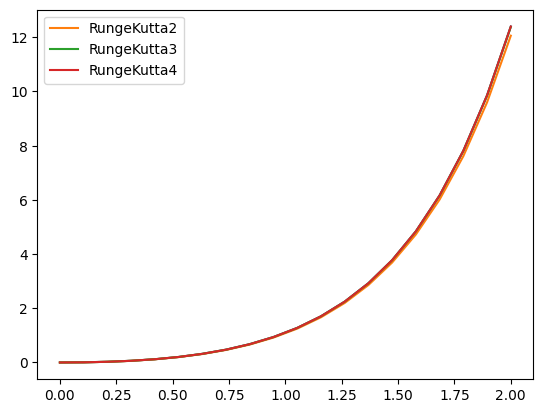

In [38]:
plt.plot(t,yext)
plt.plot(t,y2,label='RungeKutta2')
plt.plot(t,y3,label='RungeKutta3')
plt.plot(t,y4,label='RungeKutta4')
plt.legend()

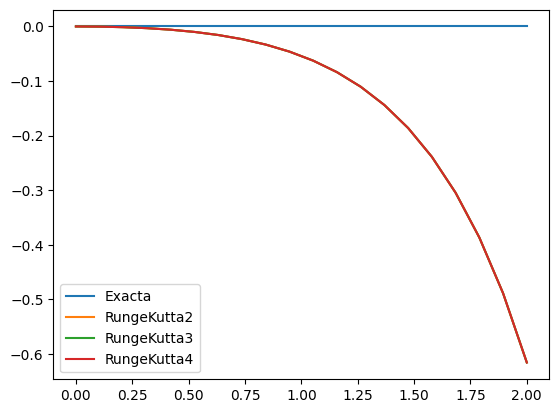

In [40]:
plt.subplot(1,1,1)
y2 -= yext
y3 -= yext
y4 -= yext
y2 /= np.linalg.norm(y2)
y3 /= np.linalg.norm(y3)
y4 /= np.linalg.norm(y4)
plt.plot(t,yext-yext,label='Exacta')
plt.plot(t,y2,label='RungeKutta2')
plt.plot(t,y3,label='RungeKutta3')
plt.plot(t,y4,label='RungeKutta4')
plt.legend()
plt.show()